In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for visualisation
#fig=plt.figure(figsize=(100, 100), dpi= 80, facecolor='w', edgecolor='k')
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

In [3]:
HospGeneral = pd.read_excel("C:/Users/Aswathi/Desktop/Hospital General Info.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Aswathi/Desktop/Hospital General Info.xlsx'

In [1]:
HospGeneral.head(5)

NameError: name 'HospGeneral' is not defined

In [221]:
HospGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
Provider ID                                                      4812 non-null int64
Hospital Name                                                    4812 non-null object
Address                                                          4812 non-null object
City                                                             4812 non-null object
State                                                            4812 non-null object
ZIP Code                                                         4812 non-null int64
County Name                                                      4797 non-null object
Phone Number                                                     4812 non-null int64
Hospital Type                                                    4812 non-null object
Hospital Ownership                                               4812 non-null object
Emergency Services                  

In [222]:
HospGeneral.describe()

,Provider ID,ZIP Code,Phone Number
count,4812.000000,4812.000000,4.812000e+03
mean,268136.624896,53972.197423,5.848062e+09
std,157137.830862,26911.761078,2.332309e+09
min,10001.000000,603.000000,9.369338e+08
25%,140183.500000,33015.250000,4.014533e+09
50%,260037.000000,55404.000000,6.053413e+09
75%,390220.500000,76028.000000,7.877583e+09
max,670120.000000,99929.000000,9.898943e+09


In [223]:
HospGeneral_Ownership_unique = HospGeneral['Hospital Ownership'].unique()

In [224]:
HospGeneral_Ownership = HospGeneral.groupby(['Hospital Ownership'])['Provider ID'].nunique()

In [225]:
HospGeneral_Ownership = pd.DataFrame(HospGeneral_Ownership)

In [226]:
HospGeneral_Ownership_1 = HospGeneral_Ownership.rename(columns = {'Provider ID':'No_of_Hospitals'})
HospGeneral_Ownership_1

,No_of_Hospitals
Hospital Ownership,
Government - Federal,47
Government - Hospital District or Authority,559
Government - Local,404
Government - State,66
Physician,67
Proprietary,804
Tribal,9
Voluntary non-profit - Church,338
Voluntary non-profit - Other,461


In [227]:
HospGeneral_Ownership.plot(kind='barh')

In [286]:
ax=sns.barplot(y=HospGeneral_Ownership_1.index,x=HospGeneral_Ownership_1.No_of_Hospitals,data=HospGeneral_Ownership_1,palette="Blues_d")
ax.set(xlabel='Number of  hospitals', ylabel='Ownership')

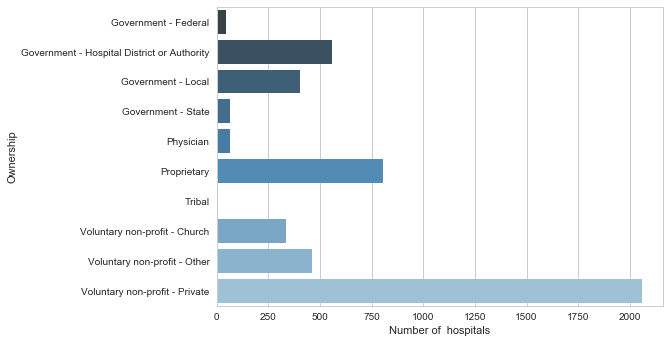

In [287]:
plt.show()

In [370]:
a = pd.pivot_table(HospGeneral,values=['Hospital overall rating'],index=['Hospital Ownership'],columns=['Hospital Type'],aggfunc='count',margins=False)

plt.figure(figsize=(10,10))
sns.heatmap(a['Hospital overall rating'],linewidths=.5,annot=True,vmin=0.01,cmap='BrBG')
plt.title('Total rating of the types of hospitals under the ownership of various community')

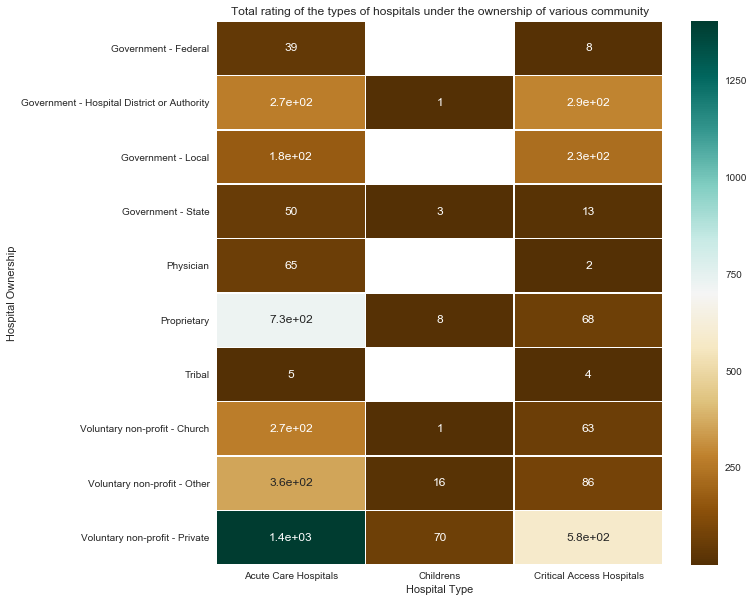

In [371]:
plt.show()

In [369]:
HospGeneral['Hospital overall rating'].unique()

array([3, 2, 'Not Available', 4, 5, 1], dtype=object)

In [233]:
HospGeneral_Data = HospGeneral.drop(HospGeneral[HospGeneral['Hospital overall rating'] == 'Not Available'].index)

In [234]:
HospGeneral_Data['Hospital overall rating'].unique()

array([3, 2, 4, 5, 1], dtype=object)

In [235]:
HospGeneral_Data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...


In [236]:
HospGeneral_Data_group = HospGeneral_Data.groupby(['Hospital overall rating'])['Provider ID'].count()

In [237]:
HospGeneral_Data_group = pd.DataFrame(HospGeneral_Data_group)
HospGeneral_Data_group

,Provider ID
Hospital overall rating,
1,107
2,678
3,1755
4,938
5,82


In [238]:
HospGeneral_Data_group1 = HospGeneral_Data_group.rename(columns = {'Provider ID':'Hospital_overall_rating'})
HospGeneral_Data_group1

,Hospital_overall_rating
Hospital overall rating,
1,107
2,678
3,1755
4,938
5,82


In [239]:
ax=sns.barplot(x=HospGeneral_Data_group1.index,y=HospGeneral_Data_group1.Hospital_overall_rating,data=HospGeneral_Data_group1)
ax.set(xlabel='Number of  hospitals', ylabel='Ownership')

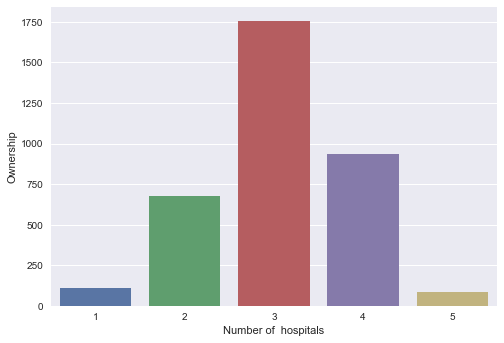

In [240]:
plt.show()

In [241]:
HospGeneral_Data

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
7,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY,2056208100,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN
9,10019,HELEN KELLER MEMORIAL HOSPITAL,1300 SOUTH MONTGOMERY AVENUE,SHEFFIELD,AL,35660,COLBERT,2563864556,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
10,10021,DALE MEDICAL CENTER,126 HOSPITAL AVE,OZARK,AL,36360,DALE,3347742601,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN


In [242]:
HospGeneral_State= HospGeneral_Data.loc[(HospGeneral_Data["Hospital overall rating"]==5)]
HospGeneral_State_1 = HospGeneral_Data.loc[(HospGeneral_Data["Hospital overall rating"]==1)]
HospGeneral_State_3 = HospGeneral_Data.loc[(HospGeneral_Data["Hospital overall rating"]==3)]

In [243]:
HospGeneral_State_group = HospGeneral_State.groupby('State')['Provider ID'].count()
HospGeneral_State_1_group = HospGeneral_State_1.groupby('State')['Provider ID'].count()
HospGeneral_State_3_group = HospGeneral_State_3.groupby('State')['Provider ID'].count()

In [244]:
#------------------ 5 Star rating------------------------
HospGeneral_State_group = pd. DataFrame(HospGeneral_State_group)
HospGeneral_State_group1 = HospGeneral_State_group.rename(columns = {'Provider ID':'No_of_Hosp_5_rating'})
HospGeneral_State_group1

,No_of_Hosp_5_rating
State,
AL,3
AR,1
AZ,2
CA,6
CO,1
FL,1
GA,2
HI,1
IA,2


In [245]:
#------------------1 Star rating -------------------------
HospGeneral_State_1_group = pd. DataFrame(HospGeneral_State_1_group)
HospGeneral_State_group_1 = HospGeneral_State_1_group.rename(columns = {'Provider ID':'No_of_Hosp_1_rating'})
HospGeneral_State_group_1

,No_of_Hosp_1_rating
State,
AR,2
AZ,3
CA,9
DC,5
FL,7
GA,4
IL,4
IN,1
KY,2


In [246]:
#-----------------3 Star rating --------------------------
HospGeneral_State_3_group = pd. DataFrame(HospGeneral_State_3_group)
HospGeneral_State_group_3 = HospGeneral_State_3_group.rename(columns = {'Provider ID':'No_of_Hosp_3_rating'})
HospGeneral_State_group_3

,No_of_Hosp_3_rating
State,
AK,8
AL,48
AR,31
AZ,26
CA,133
CO,27
CT,18
DC,1
DE,2


In [259]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(x=HospGeneral_State_group1.index,y=HospGeneral_State_group1.No_of_Hosp_5_rating,palette='BrBG')
ax.set(ylabel='Total number of hospitals with 5 rating', xlabel='States')

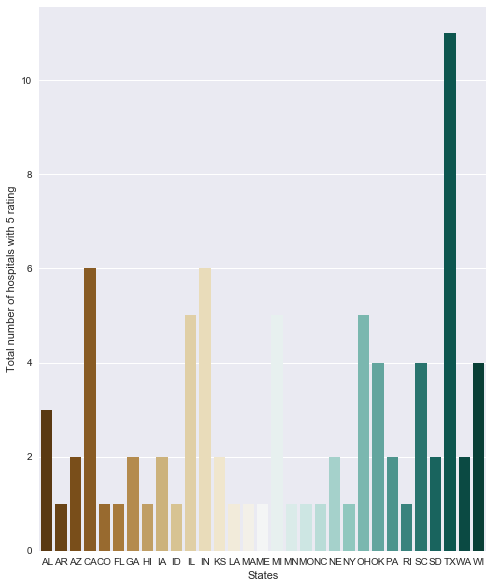

In [260]:
plt.show()

In [249]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(x=HospGeneral_State_group_1.index,y=HospGeneral_State_group_1.No_of_Hosp_1_rating,palette='GnBu_d')
ax.set(ylabel='Total number of hospitals with 1 rating', xlabel='States')

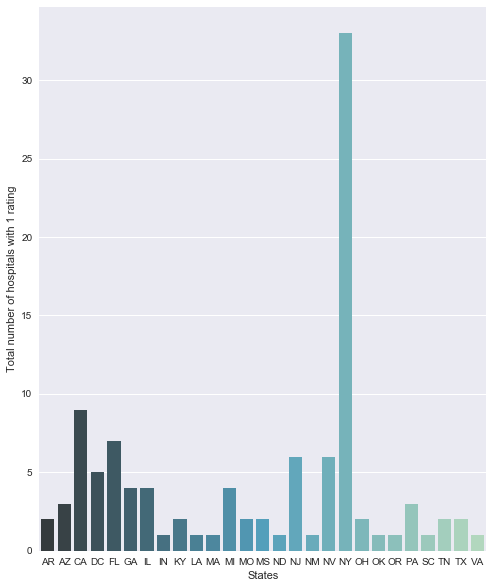

In [250]:
plt.show()

In [257]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=HospGeneral_State_group_3.index,x=HospGeneral_State_group_3.No_of_Hosp_3_rating,palette='RdBu_r')
ax.set(ylabel='Total number of hospitals with 3 rating', xlabel='States')

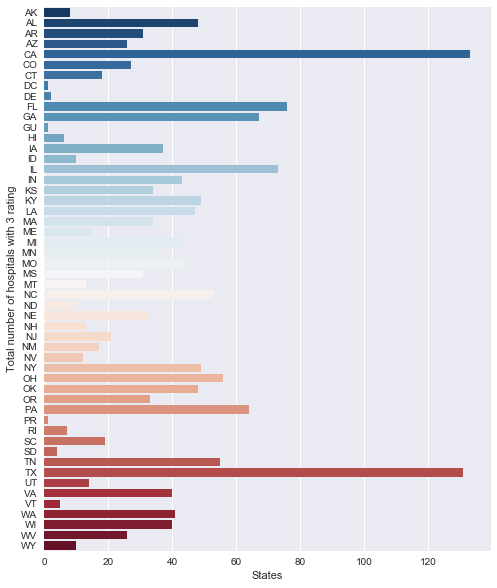

In [258]:
plt.show()

In [326]:
HospGeneral_Acute = HospGeneral_Data[HospGeneral_Data['Hospital Type']=='Acute Care Hospitals']

In [327]:
HospGeneral_Childrens = HospGeneral_Data[HospGeneral_Data['Hospital Type']=='Childrens']

In [339]:
HospGeneral_Childrens

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote


In [341]:
HospGeneral_Critical = HospGeneral_Data[HospGeneral_Data['Hospital Type']=='Critical Access Hospitals']

In [342]:
HospGeneral_Critical

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
88,11305,ST VINCENTS BLOUNT,150 GILBREATH DRIVE,ONEONTA,AL,35121,BLOUNT,2052743000,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
103,21311,PEACEHEALTH KETCHIKAN MEDICAL CENTER,3100 TONGASS AVENUE,KETCHIKAN,AK,99901,KETCHIKAN GATEWAY,9072255171,Critical Access Hospitals,Voluntary non-profit - Church,...,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
168,31300,WICKENBURG COMMUNITY HOSPITAL,520 ROSE LANE,WICKENBURG,AZ,85390,MARICOPA,9286845421,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Same as the national average,NaN
179,31314,COBRE VALLEY REGIONAL MEDICAL CENTER,5880 SOUTH HOSPITAL DRIVE,GLOBE,AZ,85501,GILA,9284021122,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN
181,31317,LA PAZ REGIONAL HOSPITAL,1200 WEST MOHAVE ROAD,PARKER,AZ,85344,LA PAZ,9286699201,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...
236,41307,CROSSRIDGE COMMUNITY HOSPITAL,310 SOUTH FALLS BOULEVARD,WYNNE,AR,72396,CROSS,8702383300,Critical Access Hospitals,Voluntary non-profit - Church,...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
237,41308,MCGEHEE HOSPITAL,900 SOUTH THIRD STREET,MCGEHEE,AR,71654,DESHA,8702225600,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
239,41310,STONE COUNTY MEDICAL CENTER,2106 EAST MAIN STREET,MOUNTAIN VIEW,AR,72560,STONE,8702694361,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
240,41311,HOWARD MEMORIAL HOSPITAL,130 MEDICAL CIRCLE,NASHVILLE,AR,71852,HOWARD,8708454400,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
241,41312,BAPTIST HEALTH MEDICAL CENTER HEBER SPINGS,1800 BYPASS ROAD,HEBER SPRINGS,AR,72543,CLEBURNE,5018873000,Critical Access Hospitals,Volu

In [343]:
HospGeneral_Acute_Ownership = HospGeneral_Acute.groupby(['Hospital Ownership'])['Provider ID'].count()

In [344]:
HospGeneral_Childrens_Ownership = HospGeneral_Childrens.groupby(['Hospital Ownership'])['Provider ID'].count()

In [345]:
HospGeneral_Critical_Ownership = HospGeneral_Critical.groupby(['Hospital Ownership'])['Provider ID'].count()

In [353]:
HospGeneral_Acute_Ownership = pd.DataFrame(HospGeneral_Acute_Ownership)
HospGeneral_Acute_Ownership = HospGeneral_Acute_Ownership.rename(columns = {'Provider ID':'No_of_Hospitals'})
HospGeneral_Acute_Ownership

,No_of_Hospitals
Hospital Ownership,
Government - Federal,15
Government - Hospital District or Authority,250
Government - Local,159
Government - State,41
Physician,19
Proprietary,591
Tribal,2
Voluntary non-profit - Church,264
Voluntary non-profit - Other,332


In [362]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=HospGeneral_Acute_Ownership.index,x=HospGeneral_Acute_Ownership.No_of_Hospitals,palette='husl')
ax.set(ylabel='Hospital Type', xlabel='No.of Hospitals')

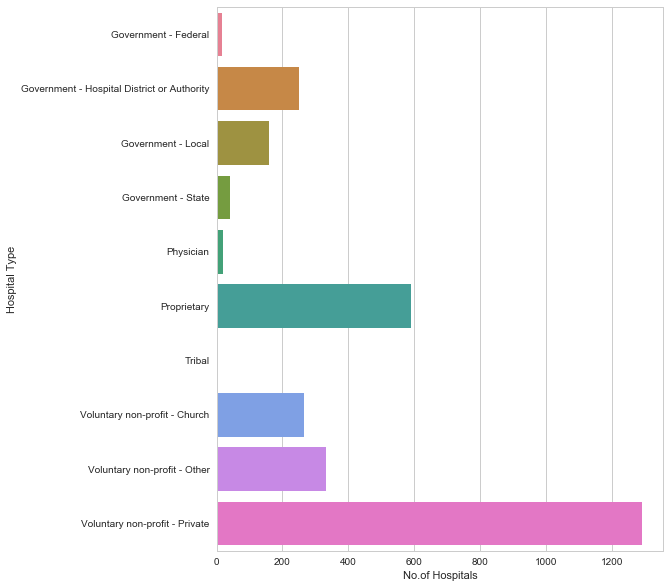

In [363]:
plt.show()

In [347]:
HospGeneral_Childrens_Ownership = pd.DataFrame(HospGeneral_Childrens_Ownership)
HospGeneral_Childrens_Ownership

,Provider ID
Hospital Ownership,


In [348]:
HospGeneral_Critical_Ownership = pd.DataFrame(HospGeneral_Critical_Ownership)

In [352]:
HospGeneral_Critical_Ownership = HospGeneral_Critical_Ownership.rename(columns = {'Provider ID':'No_of_Hospitals'})
HospGeneral_Critical_Ownership

,No_of_Hospitals
Hospital Ownership,
Government - Federal,2
Government - Hospital District or Authority,85
Government - Local,81
Government - State,4
Proprietary,24
Voluntary non-profit - Church,39
Voluntary non-profit - Other,42
Voluntary non-profit - Private,319


In [364]:
dims = (8, 10)
fig, ax = plt.subplots(figsize=dims)

ax=sns.barplot(y=HospGeneral_Critical_Ownership.index,x=HospGeneral_Critical_Ownership.No_of_Hospitals,palette='husl')
ax.set(ylabel='Hospital Type', xlabel='No.of Hospitals')

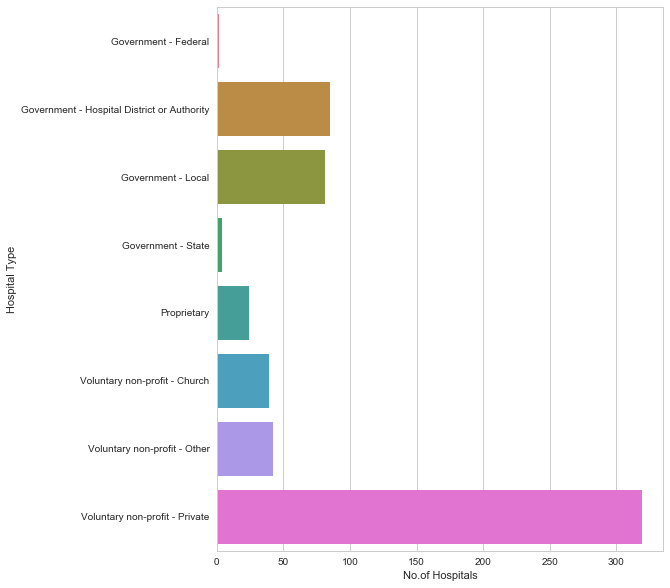

In [365]:
plt.show()

In [375]:
# How many hospitals provide Emergency Services and which type of Hosptials
#Emergency Services = YES
HospGeneral_Emergency_Yes = HospGeneral_Data[HospGeneral_Data['Emergency Services']=='Yes']


In [376]:
HospGeneral_Emergency_Yes

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN
7,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY,2056208100,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN
9,10019,HELEN KELLER MEMORIAL HOSPITAL,1300 SOUTH MONTGOMERY AVENUE,SHEFFIELD,AL,35660,COLBERT,2563864556,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
10,10021,DALE MEDICAL CENTER,126 HOSPITAL AVE,OZARK,AL,36360,DALE,3347742601,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN


In [398]:
HospGeneral_Emergency_Ownership_Yes = HospGeneral_Emergency_Yes.groupby(['Hospital Ownership'])['Provider ID'].count()

In [399]:
HospGeneral_Emergency_Ownership_Yes

Hospital Ownership
Government - Federal                             17
Government - Hospital District or Authority     328
Government - Local                              234
Government - State                               44
Physician                                        17
Proprietary                                     592
Tribal                                            2
Voluntary non-profit - Church                   292
Voluntary non-profit - Other                    361
Voluntary non-profit - Private                 1579
Name: Provider ID, dtype: int64

In [400]:
HospGeneral_Emergency_Ownership_Yes.plot(kind='barh',color='red')

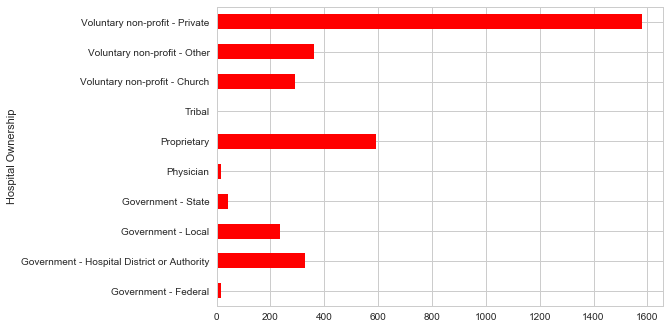

In [401]:
plt.show()

In [402]:
HospGeneral_Emergency_No = HospGeneral_Data[HospGeneral_Data['Emergency Services']=='No']

In [403]:
HospGeneral_Emergency_No

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
28,10051,GREENE COUNTY HOSPITAL,509 WILSON AVENUE,EUTAW,AL,35462,GREENE,2053723388,Acute Care Hospitals,Government - Local,...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...
40,10079,ATHENS LIMESTONE HOSPITAL,700 WEST MARKET STREET,ATHENS,AL,35611,LIMESTONE,2562339292,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
88,11305,ST VINCENTS BLOUNT,150 GILBREATH DRIVE,ONEONTA,AL,35121,BLOUNT,2052743000,Critical Access Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
132,30073,TUBA CITY REGIONAL HEALTH CARE CORPORATION,PO BOX 600,TUBA CITY,AZ,86045,COCONINO,9282832501,Acute Care Hospitals,Voluntary non-profit - Other,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...
140,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,MARICOPA,4806845898,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN
147,30105,BANNER HEART HOSPITAL,6750 EAST BAYWOOD AVENUE,MESA,AZ,85206,MARICOPA,4808545050,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...
265,50013,ST HELENA HOSPITAL,10 WOODLAND ROAD,SAINT HELENA,CA,94574,NAPA,7079633611,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
267,50017,MERCY GENERAL HOSPITAL,4001 J ST,SACRAMENTO,CA,95819,SACRAMENTO,9164534453,Acute Care Hospitals,Voluntary non-profit - Church,...,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN
268,50018,PACIFIC ALLIANCE MEDICAL CENTER,531 W COLLEGE ST,LOS ANGELES,CA,90012,LOS ANGELES,2136248411,Acute Care Hospitals,Proprietary,...,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...
313,50107,MARIAN REGIONAL MEDICAL CENTER,1400 E CHURCH ST,SANTA MARIA,CA,93454,SANTA BARBARA,8057393100,Acute Care Hospitals,Voluntary non-profit - Church,...,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN


In [404]:
HospGeneral_Emergency_Ownership_No = HospGeneral_Emergency_No.groupby(['Hospital Ownership'])['Provider ID'].count()

In [405]:
HospGeneral_Emergency_Ownership_No

Hospital Ownership
Government - Hospital District or Authority     7
Government - Local                              6
Government - State                              1
Physician                                       2
Proprietary                                    23
Voluntary non-profit - Church                  11
Voluntary non-profit - Other                   13
Voluntary non-profit - Private                 31
Name: Provider ID, dtype: int64

In [406]:
HospGeneral_Emergency_Ownership_No.plot(kind='barh',color='teal')

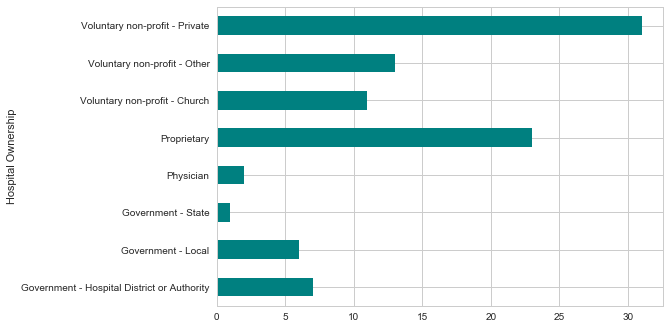

In [407]:
plt.show()